In [4]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.patches as mpatches
import matplotlib.path as mpath

(-2.0, 2.0, -2.0, 2.0)

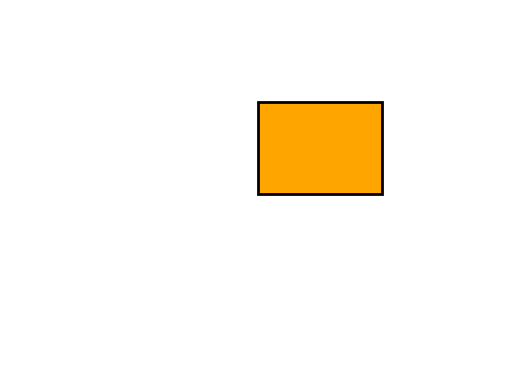

In [ ]:
# Mpath tutorial:
# https://matplotlib.org/stable/users/explain/artists/paths.html

"""
The object underlying all of the matplotlib.patches objects is the Path, 
which supports the standard set of moveto, lineto, curveto commands to 
draw simple and compound outlines consisting of line segments and splines. 
The Path is instantiated with a (N, 2) array of (x, y) vertices, and an N-length array of path codes. 
For example to draw the unit rectangle from (0, 0) to (1, 1), we could use this code:
"""

verts = [
   (0., 0.),  # left, bottom
   (0., 1.),  # left, top
   (1., 1.),  # right, top
   (1., 0.),  # right, bottom
   (0., 0.),  # ignored
]

codes = [
    mpath.Path.MOVETO,    # pick up the pen and move to the given vertex
    mpath.Path.LINETO,    # draw a line from the current position to the given vertex
    mpath.Path.LINETO,
    mpath.Path.LINETO,
    mpath.Path.CLOSEPOLY, # draw a line segment to the start point of the current polyline
]

path = mpath.Path(verts, codes) #The Path is instantiated with a (N, 2) array of (x, y) vertices, and an N-length array of path codes.

fig, ax = plt.subplots()
patch = mpatches.PathPatch(path, facecolor='orange', lw=2)
ax.add_patch(patch) 
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
plt.axis('off')

(-5.0, 5.0, -5.0, 5.0)

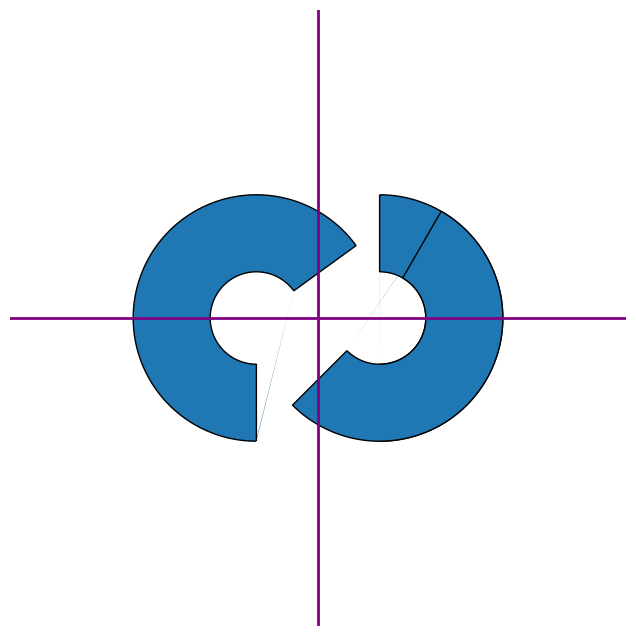

In [ ]:
def make_circle_arc(r:int, start_radians:int=0, end_radians:int=2*np.pi) -> np.ndarray:
    t = np.arange(start_radians, end_radians, 0.01)
    t = t.reshape((len(t), 1)) # do this to stack them later into x, y points!
    x = r * np.cos(t)
    y = r * np.sin(t)
    return np.hstack((x, y))     
    
def make_dee(inner_r, outer_r, start_radians:int=0, end_radians:int=2*np.pi, hshift=0) -> mpath.Path:
    """
    1. Draw straight line from the inner circle to the outer circle
    2. Draw the outer circle arc
    3. Draw straight line from the outer circle to the inner circle
    4. Draw the inner circle arc
    """
    # 1. Draw straight line from the inner circle to the outer circle
    start_line_vertices = np.array([
        [inner_r*np.cos(start_radians), inner_r*np.sin(start_radians)], 
        [outer_r*np.cos(start_radians), outer_r*np.sin(start_radians)]
    ])
    # 2. Draw the outer circle arc
    outside_circle_vertices = make_circle_arc(outer_r, start_radians, end_radians)
    # 3. Draw straight line from the outer circle to the inner circle
    end_line_vertices = np.array([
        [inner_r*np.cos(end_radians), inner_r*np.sin(end_radians)],
        [outer_r*np.cos(end_radians), outer_r*np.sin(end_radians)]
    ])
    # 4. Draw the inner circle arc
    inside_circle_vertices = make_circle_arc(inner_r, start_radians, end_radians)

    codes = np.ones(
        len(inside_circle_vertices)+2, dtype=mpath.Path.code_type
    ) * mpath.Path.LINETO
    codes[0] = mpath.Path.MOVETO
    
    # Concatenate all the paths together
    vertices = np.concatenate((start_line_vertices, 
         outside_circle_vertices, 
         end_line_vertices[::-1], 
         inside_circle_vertices[::-1]
    ))
    vertices[:, 0] += hshift

    # The codes will be all "LINETO" commands, except for "MOVETO"s at the beginning of each subpath
    all_codes = np.concatenate((codes, codes))
    
    return mpath.Path(vertices, all_codes)


fig, ax = plt.subplots(figsize=(8, 8))

path = make_dee(0.75, 2.0, start_radians=np.pi/5, end_radians=3*np.pi/2, hshift=-1)
# Add plot it
patch = mpatches.PathPatch(path, edgecolor='black')
ax.add_patch(patch)

right_path = make_dee(0.75, 2.0, start_radians=-np.pi/2, end_radians=np.pi/2, hshift=1)
right_patch = mpatches.PathPatch(right_path, edgecolor='black')
ax.add_patch(right_patch)

mini_path = make_dee(0.75, 2.0, start_radians=-3*np.pi/4, end_radians=np.pi/3, hshift=1)
mini_patch = mpatches.PathPatch(mini_path, edgecolor='black')
ax.add_patch(mini_patch)

ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_aspect(1.0)
ax.axvline(0, color='purple', lw=2)
ax.axhline(0, color='purple', lw=2)
plt.axis('off')

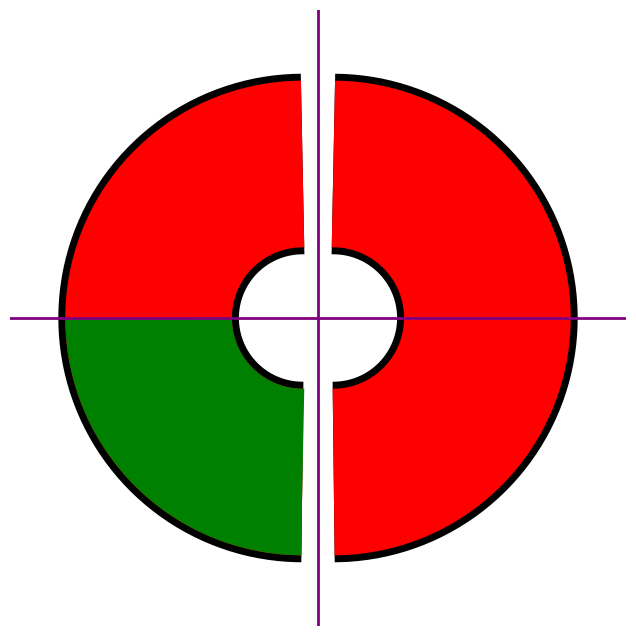

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))

t = np.arange(np.pi/2, 3*np.pi/2, 0.01)
r = 3
x, y = r * np.cos(t), r * np.sin(t)

plt.plot(
    x-0.3, y,
    color="black", 
    lw=130, 
    solid_capstyle="butt",
)

plt.plot(
    x-0.3, y,
    color="red", 
    lw=120, 
    solid_capstyle="butt",
)

plt.plot(
    -x+0.3, y,
    color="black", 
    lw=130, 
    solid_capstyle="butt",
)
plt.plot(
    -x+0.3, y,
    color="red", 
    lw=120, 
    solid_capstyle="butt",
)

t = np.arange(np.pi/2,np.pi, 0.01)
r = 3
x, y = r * np.cos(t), r * np.sin(t)
plt.plot(
    x-0.3, -y,
    color="green", 
    lw=120, 
    solid_capstyle="butt",
)

plt.axis("off")
ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)
ax.set_aspect(1.0)
ax.axvline(0, color='purple', lw=2)
ax.axhline(0, color='purple', lw=2)
plt.show()